import required libraries

In [1]:
import csv
import natsort
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


Calculate the IoU across the consecutive frames

In [ ]:


# Define the functions for calculating IoU, centroid, and area ratio
def calculate_iou(mask1, mask2):
    """
    Calculate Intersection over Union (IoU) between two probability masks.
    """
    # Compute intersection and union masks
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)

    # Calculate IoU
    iou = np.sum(intersection) / np.sum(union)
    return iou

def calculate_centroid(mask):
    """
    Calculate the centroid of a probability mask.
    """
    # Calculate the moments of the mask
    moments = cv2.moments(mask)

    # Calculate centroid coordinates
    if moments["m00"] != 0:
        centroid_x = int(moments["m10"] / moments["m00"])
        centroid_y = int(moments["m01"] / moments["m00"])
    else:
        centroid_x = -1
        centroid_y = -1

    return (centroid_x, centroid_y)

def calculate_area_ratio(mask, frame_shape):
    """
    Calculate the ratio of the area of the probability mask to the total area of the frame.
    """
    # Calculate area of the mask
    mask_area = np.sum(mask)

    # Calculate total area of the frame
    frame_area = frame_shape[0] * frame_shape[1]

    # Calculate area ratio
    area_ratio = mask_area / frame_area
    return area_ratio

# Define the folder containing the masks
#mask_folder = "/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/fusionnet_v1/billboardtoday2/frame_output_binary"
#mask_folder = "/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/linknet/billboardtoday3/frame_output_binary"
#mask_folder = "/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/unet/billboardonroad/frame_output_binary"
mask_folder = "/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/adsegnet/billboardtoday2/frame_output_binary"


# Get a list of all files in the folder
mask_files = natsort.natsorted(os.listdir(mask_folder))

# Assuming there are at least two masks
if len(mask_files) >= 2:
    # Load the first mask to get the frame shape
    mask_frame1 = cv2.imread(os.path.join(mask_folder, mask_files[0]), cv2.IMREAD_GRAYSCALE) / 255.0
    frame_shape = mask_frame1.shape


#'/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/fusionnet_v1/billboardonroad/csv/iou_results.csv'
#'/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/adsegnet/billboardtoday1/csv/iou_results.csv'
#'/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/linknet/billboardtoday2/csv/iou_results.csv'
#'/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/unet/billboardtoday3/csv/iou_results.csv'

    # Create a CSV file to store the results
    with open('/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/adsegnet/billboardtoday2/csv/iou_results1.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Mask1', 'Mask2', 'IoU', 'Centroid Frame 1', 'Centroid Frame 2', 'Area Ratio Frame 1', 'Area Ratio Frame 2'])

        # Iterate through the mask files and calculate IoU
        for i in range(len(mask_files) - 1):
            mask1 = cv2.imread(os.path.join(mask_folder, mask_files[i]), cv2.IMREAD_GRAYSCALE) / 255.0
            mask2 = cv2.imread(os.path.join(mask_folder, mask_files[i+1]), cv2.IMREAD_GRAYSCALE) / 255.0

            # Calculate IoU
            iou = calculate_iou(mask1, mask2)

            # Calculate centroid for each mask
            centroid_frame1 = calculate_centroid(mask1)
            centroid_frame2 = calculate_centroid(mask2)

            # Calculate area ratio for each mask
            area_ratio_frame1 = calculate_area_ratio(mask1, frame_shape)
            area_ratio_frame2 = calculate_area_ratio(mask2, frame_shape)

            # Write the results to the CSV file
            writer.writerow([mask_files[i], mask_files[i+1], iou, centroid_frame1, centroid_frame2, area_ratio_frame1, area_ratio_frame2])

            print(f"IoU between {mask_files[i]} and {mask_files[i+1]}:", iou, centroid_frame1, centroid_frame2, area_ratio_frame1, area_ratio_frame2)

    print("Results stored in mask_iou_results.csv")
else:
    print("Folder must contain at least two mask files.")

IoU between Frame_1.jpg and Frame_2.jpg: 0.9867385601865345 (66, 50) (66, 50) 0.3925778856464461 0.3925929649203431
IoU between Frame_2.jpg and Frame_3.jpg: 0.9732451093210587 (66, 50) (66, 50) 0.3925929649203431 0.39503915824142155
IoU between Frame_3.jpg and Frame_4.jpg: 0.968978888410168 (66, 50) (66, 50) 0.39503915824142155 0.39258147594975495
IoU between Frame_4.jpg and Frame_5.jpg: 0.9655370476737507 (66, 50) (66, 50) 0.39258147594975495 0.39430338541666665
IoU between Frame_5.jpg and Frame_6.jpg: 0.9479506452985392 (66, 50) (66, 50) 0.39430338541666665 0.39013073491115197
IoU between Frame_6.jpg and Frame_7.jpg: 0.9520771302991635 (66, 50) (65, 50) 0.39013073491115197 0.38937198414522056
IoU between Frame_7.jpg and Frame_8.jpg: 0.9919203578127255 (65, 50) (65, 50) 0.38937198414522056 0.39009818282781866
IoU between Frame_8.jpg and Frame_9.jpg: 0.963459891521553 (65, 50) (66, 50) 0.39009818282781866 0.38938155828737747
IoU between Frame_9.jpg and Frame_10.jpg: 0.9833550441453177 

C:\Users\sukri\AppData\Local\Temp\ipykernel_23092\3989600839.py:11: RuntimeWarning: invalid value encountered in long_scalars
  iou = np.sum(intersection) / np.sum(union)


IoU between Frame_698.jpg and Frame_699.jpg: 0.976563644353303 (67, 55) (66, 55) 0.3998489679074755 0.4010663200827206
IoU between Frame_699.jpg and Frame_700.jpg: 0.9816688664026983 (66, 55) (67, 55) 0.4010663200827206 0.40057708141850495
IoU between Frame_700.jpg and Frame_701.jpg: 0.9721978343576236 (67, 55) (67, 55) 0.40057708141850495 0.39861677581188726
IoU between Frame_701.jpg and Frame_702.jpg: 0.9945241971289034 (67, 55) (67, 55) 0.39861677581188726 0.3991163066789216
IoU between Frame_702.jpg and Frame_703.jpg: 0.9640631792493841 (67, 55) (67, 55) 0.3991163066789216 0.3998642865349265
IoU between Frame_703.jpg and Frame_704.jpg: 0.9942832014072119 (67, 55) (67, 55) 0.3998642865349265 0.3998678768382353
IoU between Frame_704.jpg and Frame_705.jpg: 0.9780746333672136 (67, 55) (67, 54) 0.3998678768382353 0.39888820274203435
IoU between Frame_705.jpg and Frame_706.jpg: 0.9762456546929317 (67, 54) (67, 55) 0.39888820274203435 0.39816367953431375
IoU between Frame_706.jpg and Fram

plot

['Frame_1', 'Frame_2', 'Frame_3', 'Frame_4', 'Frame_5', 'Frame_6', 'Frame_7', 'Frame_8', 'Frame_9', 'Frame_10', 'Frame_11', 'Frame_12', 'Frame_13', 'Frame_14', 'Frame_15', 'Frame_16', 'Frame_17', 'Frame_18', 'Frame_19', 'Frame_20', 'Frame_21', 'Frame_22', 'Frame_23', 'Frame_24', 'Frame_25', 'Frame_26', 'Frame_27', 'Frame_28', 'Frame_29', 'Frame_30', 'Frame_31', 'Frame_32', 'Frame_33', 'Frame_34', 'Frame_35', 'Frame_36', 'Frame_37', 'Frame_38', 'Frame_39', 'Frame_40', 'Frame_41', 'Frame_42', 'Frame_43', 'Frame_44', 'Frame_45', 'Frame_46', 'Frame_47', 'Frame_48', 'Frame_49', 'Frame_50', 'Frame_51', 'Frame_52', 'Frame_53', 'Frame_54', 'Frame_55', 'Frame_56', 'Frame_57', 'Frame_58', 'Frame_59', 'Frame_60', 'Frame_61', 'Frame_62', 'Frame_63', 'Frame_64', 'Frame_65', 'Frame_66', 'Frame_67', 'Frame_68', 'Frame_69', 'Frame_70', 'Frame_71', 'Frame_72', 'Frame_73', 'Frame_74', 'Frame_75', 'Frame_76', 'Frame_77', 'Frame_78', 'Frame_79', 'Frame_80', 'Frame_81', 'Frame_82', 'Frame_83', 'Frame_84', 

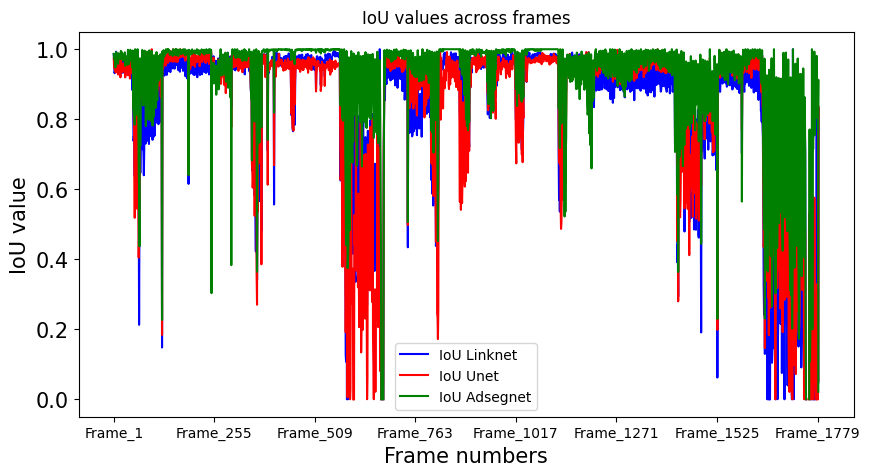

In [ ]:
'''
Line Graph for IoU Values Across Frames
'''

import pandas as pd

df = pd.read_csv('/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/csv/iou_result_v3.csv')

# Extract the IoU values and frame numbers from csv
#iou_values = (np.floor(df['IoU'].head(62) * 10) / 10.0).tolist()
iou_values_linknet = df['IoU_linknet'].tolist()
iou_values_unet = df['IoU_unet'].tolist()
iou_values_adsegnet = df['IoU_adsegnet'].tolist()
frames = df['Mask1'].tolist()#.head(62).tolist()
print(frames)
#print(iou_values)

print(len(frames)) #1572

num_ticks = 7#6#7  # Number of ticks
step_size = len(frames) // num_ticks  # Calculate the step size
print(step_size)
tick_positions = list(range(0, len(frames), step_size))  # Calculate tick positions
tick_labels = frames[::step_size]  # Select tick labels

'''
plt.figure(figsize=(10, 5))
plt.plot(frames, iou_values, marker='o', linestyle='-', color='b')
plt.title('IoU values  aross frames')
plt.xlabel('Frame number')
plt.xticks(tick_positions, tick_labels)
plt.ylabel('IoU value')
#plt.grid(True)
plt.show()
'''
plt.figure(figsize=(10, 5))
plt.plot(frames, iou_values_linknet,  linestyle='-', color='b', label='IoU Linknet')#marker='o',
plt.plot(frames, iou_values_unet,  linestyle='-', color='r', label='IoU Unet')#marker='o',
plt.plot(frames, iou_values_adsegnet,  linestyle='-', color='g', label='IoU Adsegnet')#marker='o',
plt.title('IoU values across frames')
plt.xlabel('Frame numbers', fontsize=15)
plt.ylabel('IoU value',fontsize=15)
plt.xticks(tick_positions, tick_labels, fontsize=10)#12#10
plt.yticks(fontsize=15)
plt.legend()
plt.savefig('/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/csv/iou_v3_1.jpg',  bbox_inches = 'tight', pad_inches = 0)
plt.show()

['Frame_2', 'Frame_3', 'Frame_4', 'Frame_5', 'Frame_6', 'Frame_7', 'Frame_8', 'Frame_9', 'Frame_10', 'Frame_11', 'Frame_12', 'Frame_13', 'Frame_14', 'Frame_15', 'Frame_16', 'Frame_17', 'Frame_18', 'Frame_19', 'Frame_20', 'Frame_21', 'Frame_22', 'Frame_23', 'Frame_24', 'Frame_25', 'Frame_26', 'Frame_27', 'Frame_28', 'Frame_29', 'Frame_30', 'Frame_31', 'Frame_32', 'Frame_33', 'Frame_34', 'Frame_35', 'Frame_36', 'Frame_37', 'Frame_38', 'Frame_39', 'Frame_40', 'Frame_41', 'Frame_42', 'Frame_43', 'Frame_44', 'Frame_45', 'Frame_46', 'Frame_47', 'Frame_48', 'Frame_49', 'Frame_50', 'Frame_51', 'Frame_52']
[0.97, 0.97, 0.97, 0.95, 0.95, 0.99, 0.96, 0.98, 0.98, 0.97, 0.96, 0.99, 0.97, 0.98, 0.99, 0.98, 0.97, 1.0, 0.99, 0.99, 0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.99, 0.95, 0.98, 0.98, 0.96, 0.96, 0.97, 0.96, 1.0, 0.97, 0.96, 0.96, 0.98, 0.97, 1.0, 0.98, 0.98, 0.98, 0.98, 0.95, 1.0, 0.83, 0.82, 0.81]
10


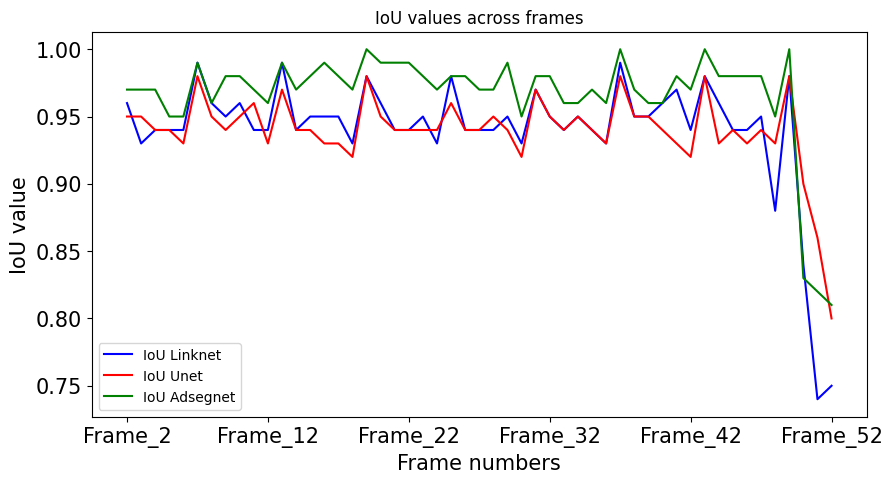

In [38]:
'''
Line Graph for IoU Values Across Frames
'''

import pandas as pd

df = pd.read_csv('/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/csv/iou_result_v3.csv')

# Extract the IoU values and frame numbers from csv
iou_values_linknet = np.round(df['IoU_linknet'][1:52],2).tolist()
iou_values_unet = np.round(df['IoU_unet'][1:52],2).tolist()
iou_values_adsegnet = np.round(df['IoU_adsegnet'][1:52],2).tolist()
frames = df['Mask1'][1:52].tolist()
print(frames)
#print(iou_values)
'''
iou_values_linknet = np.round(df['IoU_linknet'][411:495],2).tolist()
iou_values_unet = np.round(df['IoU_unet'][411:495],2).tolist()
iou_values_adsegnet = np.round(df['IoU_adsegnet'][411:495],2).tolist()
frames = df['Mask1'][411:495].tolist()
print(len(frames)) #1572
'''
print(iou_values_adsegnet)

num_ticks = 5#6#7  # Number of ticks
step_size = len(frames) // num_ticks  # Calculate the step size
print(step_size)
tick_positions = list(range(0, len(frames), step_size))  # Calculate tick positions
tick_labels = frames[::step_size]  # Select tick labels


plt.figure(figsize=(10, 5))
plt.plot(frames, iou_values_linknet,  linestyle='-', color='b', label='IoU Linknet')#marker='o',
plt.plot(frames, iou_values_unet,  linestyle='-', color='r', label='IoU Unet')#marker='o',
plt.plot(frames, iou_values_adsegnet,  linestyle='-', color='g', label='IoU Adsegnet')#marker='o',
plt.title('IoU values across frames')
plt.xlabel('Frame numbers', fontsize=15)
plt.ylabel('IoU value',fontsize=15)
plt.xticks(tick_positions, tick_labels, fontsize=15)#12#10
plt.yticks(fontsize=15)
plt.legend()
plt.savefig('/python_programming/phd/billboard_cascadenetwork/test_results/video_frame/csv/iou_v3_rnd1.jpg',  bbox_inches = 'tight')
plt.show()

heatmap plot

In [ ]:

# Example IoU values matrix for the object across 100 frames
#iou_matrix = [[0.9], [0.85], [0.88], [0.84], [0.90], [0.87], [0.85], [0.83], [0.82], [0.85], [0.88], [0.86]]  # and so on
#frames = list(range(1, len(iou_values) + 1))

plt.figure(figsize=(10, 5))
heatmap = plt.imshow(iou_values, cmap='coolwarm', aspect='auto')  # 'aspect=auto' ensures the aspect ratio is appropriate
plt.colorbar(heatmap, label='IoU Value')
plt.title('IoU Heatmap for Object Across Frames')
plt.ylabel('Object Index (Single Object)')
plt.xlabel('Frame Number')
plt.show()